In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import csv

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import LSTM
from keras import layers
from keras import optimizers
from matplotlib import pyplot

from keras.models import model_from_json
from keras.models import load_model
import os


**Reading the datasets and concatenating:-**

In [ ]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_100.csv"
df_train100 = pd.read_csv(path,header = None) 


path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_200.csv"
df_train200 = pd.read_csv(path,header = None) 


path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/t_300.csv"
df_train300 = pd.read_csv(path,header = None) 


path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_400.csv"
df_train400 = pd.read_csv(path,header = None) 


path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_500.csv"
df_train500 = pd.read_csv(path,header = None) 


path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_600.csv"
df_train600 = pd.read_csv(path,header = None) 


path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_700.csv"
df_train700 = pd.read_csv(path,header = None) 



path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_800.csv"
df_train800 = pd.read_csv(path,header = None) 


path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_900.csv"
df_train900 = pd.read_csv(path,header = None) 

path = "/content/gdrive/MyDrive/Colab Notebooks/Transmission/T_1000.csv"
df_train1000= pd.read_csv(path,header = None) 


df_merge = df_train100.append(df_train200)
df_merge = df_merge.append(df_train300)
df_merge = df_merge.append(df_train400)
df_merge = df_merge.append(df_train500)
df_merge = df_merge.append(df_train600)
df_merge = df_merge.append(df_train700)
df_merge = df_merge.append(df_train800)
df_merge = df_merge.append(df_train900)
df_merge = df_merge.append(df_train1000)
df_merge.shape
df_merge



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402
0,6,0.478,-0.428,-0.050,0.000609,0.000175,-0.000784,1.039,-0.792,-0.247,0.001000,5.830000e-04,-0.002000,0.957,-0.537,-0.420,0.000686,0.000815,-0.002000,1.019,-0.433,-0.585,0.000500,0.001000,-0.002000,0.943,-0.218,-0.725,0.000159,0.001000,-0.001000,0.898,-0.055,-0.843,-0.000102,0.001000,-0.001000,0.780,0.148,-0.928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0.479,-0.426,-0.053,0.000606,0.000180,-0.000786,1.041,-0.787,-0.254,0.001000,5.930000e-04,-0.002000,0.957,-0.532,-0.426,0.000678,0.000823,-0.002000,1.018,-0.427,-0.590,0.000492,0.001000,-0.002000,0.942,-0.212,-0.730,0.000149,0.001000,-0.001000,0.895,-0.049,-0.846,-0.000112,0.001000,-0.001000,0.776,0.154,-0.930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,0.503,-0.383,-0.120,0.000528,0.000282,-0.000810,1.072,-0.684,-0.388,0.000906,7.920000e-04,-0.002000,0.957,-0.425,-0.532,0.000499,0.000977,-0.001000,0.998,-0.305,-0.693,0.000291,0.001000,-0.002000,0.895,-0.086,-0.809,-0.000050,0.001000,-0.001000,0.829,0.080,-0.909,-0.000312,0.001000,-0.001000,0.690,0.279,-0.969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.279,0.246,-0.525,-0.000469,0.000820,-0.000351,0.448,0.632,-1.080,-0.001000,2.000000e-03,-0.000511,0.193,0.718,-0.911,-0.001000,0.001000,-0.000123,0.047,0.861,-0.908,-0.001000,0.001000,0.000119,-0.166,0.926,-0.760,-0.002000,0.001000,0.000441,-0.332,0.989,-0.657,-0.002000,0.000878,0.000695,-0.513,0.997,-0.484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.049,0.429,-0.477,-0.000724,0.000702,0.000022,-0.046,0.962,-0.916,-0.002000,1.000000e-03,0.000275,-0.252,0.928,-0.675,-0.001000,0.000924,0.000566,-0.419,1.017,-0.598,-0.002000,0.000776,0.000827,-0.588,0.981,-0.394,-0.002000,0.000443,0.001000,-0.725,0.967,-0.242,-0.001000,0.000193,0.001000,-0.844,0.882,-0.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,-0.327,-0.192,0.520,-0.000140,0.000020,0.000119,-0.556,-0.530,1.085,-0.000270,2.360000e-07,0.000270,-0.296,-0.642,0.938,-0.000202,-0.000061,0.000263,-0.160,-0.795,0.955,-0.000182,-0.000109,0.000291,0.057,-0.883,0.826,-0.000124,-0.000159,0.000283,0.224,-0.962,0.737,-0.000081,-0.000199,0.000281,0.415,-0.993,0.578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,10,-0.098,-0.398,0.496,-0.000098,-0.000051,0.000149,-0.058,-0.910,0.968,-0.000169,-1.440000e-04,0.000312,0.162,-0.900,0.738,-0.000094,-0.000178,0.000272,0.328,-1.003,0.675,-0.000056,-0.000223,0.000279,0.509,-0.988,0.479,0.000007,-0.000250,0.000243,0.655,-0.989,0.334,0.000055,-0.000274,0.000219,0.789,-0.923,0.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
print(df_merge)
print(df_merge.shape)

     0      1      2      3         4     ...  6398  6399  6400  6401  6402
0       6  0.478 -0.428 -0.050  0.000609  ...   NaN   NaN   NaN   NaN   NaN
1       6  0.479 -0.426 -0.053  0.000606  ...   NaN   NaN   NaN   NaN   NaN
2       5  0.503 -0.383 -0.120  0.000528  ...   NaN   NaN   NaN   NaN   NaN
3       1  0.279  0.246 -0.525 -0.000469  ...   NaN   NaN   NaN   NaN   NaN
4       1  0.049  0.429 -0.477 -0.000724  ...   NaN   NaN   NaN   NaN   NaN
..    ...    ...    ...    ...       ...  ...   ...   ...   ...   ...   ...
995    10 -0.327 -0.192  0.520 -0.000140  ...   NaN   NaN   NaN   NaN   NaN
996    10 -0.098 -0.398  0.496 -0.000098  ...   NaN   NaN   NaN   NaN   NaN
997    10  0.519 -0.330 -0.190  0.000119  ...   NaN   NaN   NaN   NaN   NaN
998    10 -0.299  0.524 -0.224 -0.000015  ...   NaN   NaN   NaN   NaN   NaN
999    10 -0.139 -0.370  0.508 -0.000107  ...   NaN   NaN   NaN   NaN   NaN

[5500 rows x 6403 columns]
(5500, 6403)


In [ ]:
X = df_merge.iloc[:5500,1:6403].values
y = df_merge.iloc[:5500,0].values
print(X)
print(y)

[[ 0.478 -0.428 -0.05  ...    nan    nan    nan]
 [ 0.479 -0.426 -0.053 ...    nan    nan    nan]
 [ 0.503 -0.383 -0.12  ...    nan    nan    nan]
 ...
 [ 0.519 -0.33  -0.19  ...    nan    nan    nan]
 [-0.299  0.524 -0.224 ...    nan    nan    nan]
 [-0.139 -0.37   0.508 ...    nan    nan    nan]]
[ 6  6  5 ... 10 10 10]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:5500,0:])
X[:5500,0:] = imputer.transform(X[:5500,0:])

print('\n Dataset after removing missing values : \n' ,X)


 Dataset after removing missing values : 
 [[ 4.78000000e-01 -4.28000000e-01 -5.00000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.79000000e-01 -4.26000000e-01 -5.30000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 5.03000000e-01 -3.83000000e-01 -1.20000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 ...
 [ 5.19000000e-01 -3.30000000e-01 -1.90000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-2.99000000e-01  5.24000000e-01 -2.24000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-1.39000000e-01 -3.70000000e-01  5.08000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
print(X_train)
print(X_train.shape)

[[ 3.72000000e-01 -5.07000000e-01  1.36000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-1.05000000e-01 -3.93000000e-01  4.98000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-4.85000000e-01  6.80000000e-02  4.17000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 ...
 [ 5.80000000e-02  4.23000000e-01 -4.81000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.21000000e-01  6.10000000e-02 -4.83000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-1.51000000e-01 -3.60000000e-01  5.11000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]]
(4125, 6402)


In [ ]:
print(y_train)
print(y_train.shape)

[ 9  2  4 ...  1  7 10]
(4125,)


In [ ]:
print(X_test)
print(X_test.shape)

[[ 4.92000000e-01 -4.06000000e-01 -8.60000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-2.90000000e-01 -2.35000000e-01  5.25000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.56000000e-01 -4.54000000e-01 -3.00000000e-03 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 ...
 [-2.07000000e-01  5.22000000e-01 -3.14000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.38000000e-01 -4.70000000e-01  3.20000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.85000000e-01 -4.17000000e-01 -6.90000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]]
(1375, 6402)


In [ ]:
print(y_test)
print(y_test.shape)

[7 1 1 ... 7 1 4]
(1375,)


In [ ]:
print(X_train)
print(X_train.shape)

[[ 3.72000000e-01 -5.07000000e-01  1.36000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-1.05000000e-01 -3.93000000e-01  4.98000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-4.85000000e-01  6.80000000e-02  4.17000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 ...
 [ 5.80000000e-02  4.23000000e-01 -4.81000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.21000000e-01  6.10000000e-02 -4.83000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-1.51000000e-01 -3.60000000e-01  5.11000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]]
(4125, 6402)


In [ ]:
print(X_test)
print(X_test.shape)

[[ 4.92000000e-01 -4.06000000e-01 -8.60000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [-2.90000000e-01 -2.35000000e-01  5.25000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.56000000e-01 -4.54000000e-01 -3.00000000e-03 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 ...
 [-2.07000000e-01  5.22000000e-01 -3.14000000e-01 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.38000000e-01 -4.70000000e-01  3.20000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]
 [ 4.85000000e-01 -4.17000000e-01 -6.90000000e-02 ...  9.39666667e-05
   7.15000000e-05 -2.05000000e-04]]
(1375, 6402)


In [ ]:
X_train = X_train.reshape(4125,1,6402)
print(X_train.shape)

(4125, 1, 6402)


In [ ]:
X_test = X_test.reshape(1375,1,6402)
print(X_test.shape)

(1375, 1, 6402)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4125, 1, 6402)
(4125,)
(1375, 1, 6402)
(1375,)


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences = True))
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
opt = optimizers.Adadelta(lr=0.25, decay=1e-6, )
model.compile(loss='mae', optimizer=opt, metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test),verbose=1, shuffle=False)


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 1, 128)            3343872   
_________________________________________________________________
lstm_53 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 3,475,585
Trainable params: 3,475,585
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
33/33 [==============================] - 3s 31ms/step - loss: 4.8313 - accuracy: 0.0137 - val_loss: 3.2209 - val_accuracy: 0.1869
Epoch 2/1000
33/33 [==============================] - 0s 10ms/step - loss: 2.7155 - accuracy: 0.1841 - val_loss: 2.0202 - val_accuracy: 0.1884
Epoch 3/1000
33/33 [==============================] - 0s 10ms/step - loss: 1.8445 

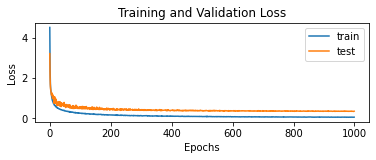

In [ ]:
# plot history
pyplot.subplot(211)
pyplot.title('Training and Validation Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()

pyplot.show()





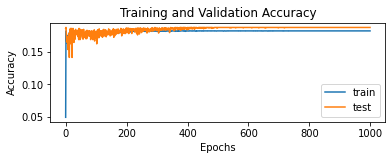

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Training and Validation Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()

pyplot.show()

In [ ]:
output = model.predict(X_test)
print(output.shape)
output = np.rint(output)
result = np.concatenate((output.reshape(len(output),1), y_test.reshape(len(y_test),1)),1)

(1375, 1)


In [ ]:
print(result[-50:])

[[ 5.  6.]
 [ 8.  8.]
 [ 9.  8.]
 [ 1.  1.]
 [ 8.  8.]
 [ 8.  8.]
 [ 6.  5.]
 [ 8.  7.]
 [ 3.  2.]
 [ 4.  5.]
 [ 6.  6.]
 [ 3.  3.]
 [ 9.  9.]
 [ 6.  6.]
 [ 6.  6.]
 [ 9.  9.]
 [ 3.  3.]
 [ 4.  4.]
 [ 2.  2.]
 [ 8.  8.]
 [ 4.  3.]
 [ 5.  5.]
 [ 6.  6.]
 [ 7.  7.]
 [ 9.  9.]
 [ 7.  8.]
 [ 1.  1.]
 [ 1.  1.]
 [ 6.  6.]
 [ 5.  5.]
 [ 8. 10.]
 [ 4.  4.]
 [ 4.  4.]
 [ 6.  6.]
 [ 9.  7.]
 [ 2.  1.]
 [10. 10.]
 [ 2.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 9.  9.]
 [ 5.  5.]
 [ 7.  7.]
 [10. 10.]
 [ 4.  4.]
 [ 2.  2.]
 [ 7.  7.]
 [ 1.  1.]
 [ 4.  4.]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, output)
print(cm)
accuracy_score(y_test, output)

[[227  20  10   2   0   0   0   0   0   0]
 [  0  79  25   8   1   0   0   0   0   0]
 [  0   6 103  12   0   0   1   0   0   0]
 [  0   1   3 102  21   4   0   0   0   0]
 [  0   0   1  12 107   7   0   0   0   0]
 [  0   1   0   8  20  97   7   2   1   0]
 [  0   0   0   1   2   5  99  21   5   0]
 [  0   2   1   0   0   0   9  95   8   1]
 [  0   0   1   0   0   0   4  17  94   3]
 [  0   0   0   0   0   1   2   6  17  93]]


0.7970909090909091

In [ ]:
f1_score(y_test, output, average='weighted')

0.8001206511160931